## MNIST 使用
MNIST is a computer vision dataset. It consists of black and white images from zero to nine. Each image is 28 * 28. Also, it includes labels for each image, telling us which digit it is.

![Alt text](./images/dnn_implement/Selection_017.png)
![Alt text](./images/dnn_implement/Selection_018.png)


In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


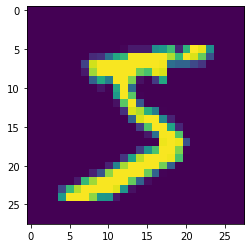

In [2]:
plt.figure()
plt.imshow(x_train[0])

plt.show()

In [2]:
x_train = x_train.reshape([x_train.shape[0], 28*28])
x_test = x_test.reshape([x_test.shape[0], 28*28])
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


# TensorFlow2不同創建模型的方法  
ref:　https://towardsdatascience.com/3-ways-to-build-neural-networks-in-tensorflow-with-the-keras-api-80e92d3b5b7e

![title](images/diff_method.png)

# Sequential API
Keras使用一層一層依序串接起來的類神經網路架構

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

# sequential API

model = keras.Sequential([ 
          layers.Flatten(input_shape=(28, 28)), 
          layers.Dense(256,'relu'), 
          layers.Dense(10, "softmax"),
          ])
model.summary()

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Functional API
Keras使用類似函數的形式h(g(f(x)))將一層一層layer串起來

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train)

# functional API

inputs = keras.Input(shape=(28, 28)) 
x = layers.Flatten()(inputs) 
x = layers.Dense(256, "relu")(x) 
outputs = layers.Dense(10, "softmax")(x) 

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Model SubClassing
TensorFlow內使用類別與建構子的定義來架設類神經網路，須注意class內需要定義__init__()建構子與call()方法  
建構子用來初始化instance，定義不同layer的規格  
call()用來連接不同layer，創造DNN instance

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.reset_default_graph()

# Model Subclassing

class CustomModel(tf.keras.Model):
    # 定義網路每一層
    def __init__(self):
        super().__init__()
        self.layer_1 = tf.keras.layers.Flatten()
        self.layer_2 = tf.keras.layers.Dense(256, "relu") # 784*256 + 256
        self.layer_3 = tf.keras.layers.Dense(10, "softmax") # 256*10 + 10
    # 將不同層連接起來
    def call(self, inputs):
        x = self.layer_1(inputs)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x

model = CustomModel()
model.build((None, 28, 28))
model.summary()

Model: "custom_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
